# MNIST Artificial Neural Network

In [1]:
#load libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display

In [2]:
train_data, test_data = tfds.load('mnist', split=['train', 'test'])
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [3]:
def transform(elm):
    return (tf.cast(elm['image'], tf.float32) / 255, tf.one_hot(elm['label'], 10) #1-0, one-hot encoding
           )
train_validation_data = train_data.map(transform, num_parallel_calls=tf.data.AUTOTUNE)

In [4]:
# Take the elements at index 9, 19, 29... into the validation dataset
validation_data = train_validation_data.shard(10, 9)
validation_data = validation_data.batch(64)
validation_data = validation_data.cache()
validation_data = validation_data.prefetch(tf.data.AUTOTUNE)

In [5]:
# Create a new train_data dataset. Append the remaining shards of the train_validation_data dataset.
train_data = train_validation_data.shard(10, 8)
for i in range(8):
    train_data = train_data.concatenate(train_validation_data.shard(10, i))
train_data = train_data.cache()
train_data = train_data.shuffle(len(train_data))
train_data = train_data.batch(64)
train_data = train_data.prefetch(tf.data.AUTOTUNE)

In [6]:
test_data = test_data.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(64)
test_data = test_data.cache()
test_data = test_data.prefetch(tf.data.AUTOTUNE)

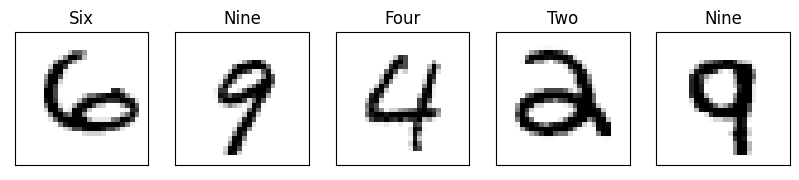

In [7]:
imgs, labels = train_data.as_numpy_iterator().next()
plt.figure(figsize=(10,10)) 
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(imgs[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_names[np.argmax(labels[i])])
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=15, kernel_size=4, input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0095)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_data,
    validation_data=validation_data,
    epochs=50,
    verbose = 0
         )

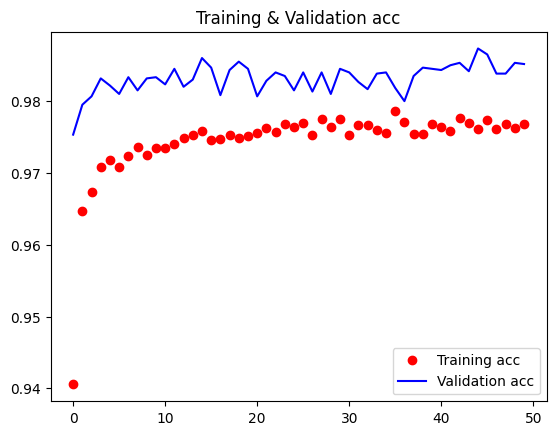

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], 'ro', label='Training acc')
plt.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training & Validation acc')
plt.legend()
plt.figure()
plt.show()

In [11]:
model.evaluate(test_data, return_dict=True)

157/157 [==============================] - 1s 4ms/step - loss: 0.0658 - accuracy: 0.9820


{'loss': 0.06580378115177155, 'accuracy': 0.9819999933242798}